# More About the `Brain` Class

Besides the basic functionalities already covered about the `Brain` class, you might find useful some others.

Let's start by initialising a Brain, importing the `constants` module, and importing the `resources` package:

In [1]:
from maybrain import constants as ct
from maybrain import resources as rr
from maybrain import brain as mbt
a = mbt.Brain()
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.import_spatial_info(rr.MNI_SPACE_COORDINATES_500)
a.apply_threshold()

## Identifying the Brain

As it is a brain, it means it was scanned from a subject, either a human or other animals. **Brain** has two fields in which you can put information about the subject and the scan for easier identification: 

In [2]:
a.subject = 2316 # For example, an ID
a.scan = '20170501U-ID15160' # For example, the day of the scan and the correspondent ID

# Python also has functionalities if you want to uniquely identify a Brain instance:
print(id(a))

139662807851584


## Updating the Adjacency Matrix

After working directly with the *networkX* `G` object which you have inside *Brain*, you can directly update your original adjacency matrix, by getting the values from `G`.

One way is to choose a specific edge to update:

In [3]:
print("Old value at edge (2,3) in adjMat: ", a.adjMat[2][3])
print("Old value at edge (2,3) in a.G", a.G.edges[2,3][ct.WEIGHT])

# Changing edge (2,3) at a.G:
a.G.edges[2,3][ct.WEIGHT] = 3
a.update_adj_mat((2,3))
print("New value at edge (2,3) in a.G: ", a.G.edges[2,3][ct.WEIGHT])
print("New value at edge (2,3) in adjMat: ", a.adjMat[2][3])


Old value at edge (2,3) in adjMat:  0.224232195604
Old value at edge (2,3) in a.G 0.224232195604
New value at edge (2,3) in a.G:  3
New value at edge (2,3) in adjMat:  3.0


You can also update the whole adjacency matrix at once. Note that in our `G` object there is no edge between a node to itself thus, when reconstructing the adjacency matrix, that value will be `nan`:

In [4]:
print("Weight of edge (0,0) in adjMat: ", a.adjMat[0][0])
a.reconstruct_adj_mat()
print("Weight of edge (0,0) in adjMat after reconstructing: ", a.adjMat[0][0])

Weight of edge (0,0) in adjMat:  0.0
Weight of edge (0,0) in adjMat after reconstructing:  nan


## Removing Unconnected Nodes

After a while you might have some nodes in `G` which are not connected to any other node. You can remove those nodes:

In [5]:
# Import adjacency file again because adjMat was altered before
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.apply_threshold(threshold_type="totalEdges", value = 1)

print("Number of nodes: ", a.G.number_of_nodes())
a.remove_unconnected_nodes()
print("Number of nodes after removing: ", a.G.number_of_nodes())

Number of nodes:  500
Number of nodes after removing:  2


## Linked Nodes

Looking to the edges of your `G` object you can see which nodes are connected, but you might prefer to have that information in the nodes themselves. 

With `find_linked_nodes()` you can add a property to each node saying to which other nodes it is connected. You can access that property through `constants.LINKED_NODES`.

In [6]:
# Import adjacency file again because adjMat was altered before
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.apply_threshold(threshold_type="totalEdges", value="5")
print("Our edges are: ", a.G.edges())

a.find_linked_nodes()

#As the graph is undirected, this property works on both directions:
print("Node 341 is linked to: ", a.G.nodes[341][ct.LINKED_NODES])
print("Node 238 is linked to: ", a.G.nodes[238][ct.LINKED_NODES])
print("Node 92 is linked to: ", a.G.nodes[92][ct.LINKED_NODES])
print("Node 1 is linked to: ", a.G.nodes[1][ct.LINKED_NODES], " (nothing)")

Our edges are:  [(92, 302), (96, 194), (223, 365), (238, 341), (241, 341)]
Node 341 is linked to:  [238, 241]
Node 238 is linked to:  [341]
Node 92 is linked to:  [302]
Node 1 is linked to:  []  (nothing)


## Weights to Distances

With a weight, the higher the value the stronger the connection. With a distance, the higher the value the "weaker" the connection.

If you want to convert the weights of our edges in a way that they can be seen as distances, you just have to use `weight_to_distance()`. Note that there is no measurement unit for the distance, as it just a conversion from the weights. 

Essentially, the value of the maximum weight will be approximately the value of the highest possible distance (if your weights are all positive in the first place). 

In [7]:
print("Our edges before conversion: ")
for e in a.G.edges(data=True):
    print(e)

a.weight_to_distance()

print("Our edges after conversion: ")
for e in a.G.edges(data=True):
    print(e)

Our edges before conversion: 
(92, 302, {'weight': 1.2896769679245286})
(96, 194, {'weight': 1.2930219528301885})
(223, 365, {'weight': 1.2869634132075474})
(238, 341, {'weight': 1.2818323018867921})
(241, 341, {'weight': 1.2753403320754713})
Our edges after conversion: 
(92, 302, {'distance': 0.005344984905659933, 'weight': 1.2896769679245286})
(96, 194, {'distance': 0.0020000000000000018, 'weight': 1.2930219528301885})
(223, 365, {'distance': 0.0080585396226411365, 'weight': 1.2869634132075474})
(238, 341, {'distance': 0.013189650943396414, 'weight': 1.2818323018867921})
(241, 341, {'distance': 0.019681620754717244, 'weight': 1.2753403320754713})


You can access weights and distances of specific edges through `constants.WEIGHT` and `constants.DISTANCE`, respectively:

In [8]:
print("Weight of edge (92,302):   ", a.G.edges[92, 302][ct.WEIGHT])
print("Distance of edge (92,302): ", a.G.edges[92, 302][ct.DISTANCE])

Weight of edge (92,302):    1.28967696792
Distance of edge (92,302):  0.00534498490566


## Directed Adjacency Matrix

All the examples so far consider that a brain is represented as an unidirected graph. It is possible to use **Brain** as a brain that is represented as a directed graph.

In practice, that means that when you call `import_adj_file()`, the lower half of the matrix is also considered, as now the adjacency matrix is not considered symmetric.

In [9]:
# Not directed adjacency matrix
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.apply_threshold()
print("Is the brain 'a' directed?: ", a.directed)
print("Number of edges of a: ", a.G.number_of_edges())

# Direct adjacency matrix
d = mbt.Brain(directed=True)
d.import_adj_file(rr.DUMMY_ADJ_FILE_500)
d.apply_threshold()
print("Is the brain 'd' directed?: ", d.directed)
print("Number of edges of d: ", d.G.number_of_edges())

Is the brain 'a' directed?:  False
Number of edges of a:  124750
Is the brain 'd' directed?:  True
Number of edges of d:  249500


Because of being directed, some methods cannot be executed, but an exception is thrown in those cases:

In [10]:
try:
    d.local_thresholding()
except TypeError as error:
    print("Error message:", error)

Error message: local_thresholding() not available for directed graphs


## Copying a hemisphere

With Maybrain you can copy all the nodes and attributes from one hemisphere to the other. To show how this is done, we will start by removing the nodes from the left side of our brain:

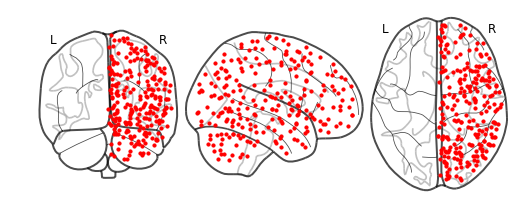

In [11]:
%matplotlib inline
from maybrain.plotting import connectome as cc

# Spatial information for plotting
a.import_spatial_info(rr.MNI_SPACE_COORDINATES_500)

# Removing nodes from left hemisphere (nodes with X coordinate below 0)
nodes_remove = []
for n in a.G.nodes():
    if a.G.nodes[n][ct.XYZ][0] < 0:
        nodes_remove.append(n)
a.G.remove_nodes_from(nodes_remove)

# Plotting how the brain is now
cc.plot_connectome(a, only_nodes=True, node_size=10)

Now, we can call maybrain's method `copy_hemisphere`, specifying that we want to copy the right hemisphere. It is noteworthy to say that at this point, if there were any nodes in the left hemisphere, they would be deleted beforehand. However, for an easier visualisation, we removed those already.

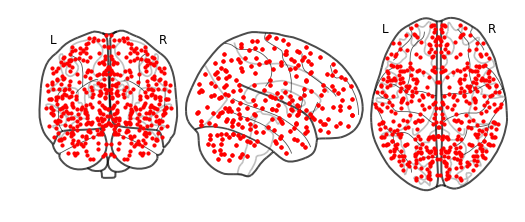

In [12]:
a.copy_hemisphere("R")
cc.plot_connectome(a, only_nodes=True, node_size=10)

We could do the same thing the other way around: copying the left hemisphere to the right hemisphere (the current nodes on the right hemisphere are deleted):

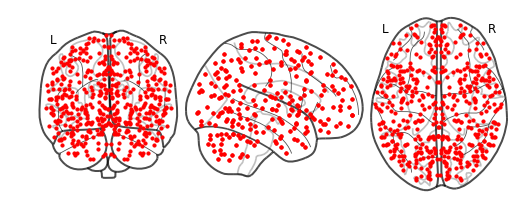

In [13]:
a.copy_hemisphere("L")
cc.plot_connectome(a, only_nodes=True, node_size=10)